# Visualizing Fire Scars Through False Color Image

**Author:** Jaslyn Miura

**GitHub Repository:** https://github.com/jaslynmiura/eds220-hwk4

### Purpose:


### Highlights:


### About the Data

### References:

In [1]:
# Import necessary libraries.
import os
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import xarray as xr
import rioxarray as rioxr
import numpy as np

In [2]:
# Reading in the Eaton fire perimeter.
eaton_perimeter = gpd.read_file(os.path.join('data',
                                             'Eaton_Perimeter_20250121',
                                             'Eaton_Perimeter_20250121.shp'))

# Reading in the Palisade fire perimeter.
palisades_perimeter = gpd.read_file(os.path.join('data',
                                                'Palisades_Perimeter_20250121',
                                                'Palisades_Perimeter_20250121.shp'))

## Explore the Perimeter Data

Your summary should include, at least, the CRS of the data and whether this is projected or geographic.

In [3]:
# Using head() to view the first 5 rows of the eaton perimeter dataframe.
eaton_perimeter.head(5)

OBJECTID            type    Shape__Are  Shape__Len  \
0         1  Heat Perimeter   2206.265625  270.199719   
1         2  Heat Perimeter  20710.207031  839.204218   
2         3  Heat Perimeter   3639.238281  250.304502   
3         4  Heat Perimeter   1464.550781  148.106792   
4         5  Heat Perimeter   4132.753906  247.960744   

                                            geometry  
0  POLYGON ((-13146936.686 4051222.067, -13146932...  
1  POLYGON ((-13150835.463 4052713.929, -13150831...  
2  POLYGON ((-13153094.697 4053057.596, -13153113...  
3  POLYGON ((-13145097.740 4053118.235, -13145100...  
4  POLYGON ((-13153131.126 4053196.882, -13153131...

In [4]:
# Check the CRS of the eaton_perimeter.
print('CRS of the eaton_perimeter:', eaton_perimeter.crs)

CRS of the eaton_perimeter: EPSG:3857


In [5]:
# Check if the eaton_perimeter data is projected or geographic.
if eaton_perimeter.crs.is_projected:
    print('The eaton_perimeter has a projected CRS')
else:
    print('The eaton_perimeter has a geographic CRS')

The eaton_perimeter has a projected CRS


In [6]:
# Check the data types in the columns of the eaton_perimeter dataframe.
print('Data types of the values in each columm:\n', eaton_perimeter.dtypes)

Data types of the values in each columm:
 OBJECTID         int64
type            object
Shape__Are     float64
Shape__Len     float64
geometry      geometry
dtype: object


In [7]:
# Check if the eaton_perimeter has an NA values.
print('Count of NA values:\n', eaton_perimeter.isna().sum())

Count of NA values:
 OBJECTID      0
type          0
Shape__Are    0
Shape__Len    0
geometry      0
dtype: int64


In [8]:
# Using head() to view the first 5 rows of the palisades_perimeter dataframe.
palisades_perimeter.head(5)

OBJECTID            type    Shape__Are   Shape__Len  \
0         1  Heat Perimeter   1182.082031   267.101144   
1         2  Heat Perimeter   2222.488281   185.498783   
2         3  Heat Perimeter     21.011719    22.412814   
3         4  Heat Perimeter    214.992188    76.639180   
4         5  Heat Perimeter  44203.453125  1569.259764   

                                            geometry  
0  POLYGON ((-13193543.302 4032913.077, -13193543...  
1  POLYGON ((-13193524.155 4033067.953, -13193524...  
2  POLYGON ((-13193598.085 4033158.222, -13193598...  
3  POLYGON ((-13193654.249 4033146.033, -13193656...  
4  POLYGON ((-13194209.580 4033236.320, -13194209...

In [9]:
# Check the CRS of the palisades_perimeter.
print('CRS of the palisades_perimeter:', palisades_perimeter.crs)

CRS of the palisades_perimeter: EPSG:3857


In [10]:
# Check if palisades_perimeter data is projected or geographic.
if palisades_perimeter.crs.is_projected:
    print('The palisades_perimeter has a projected CRS')
else:
    print('The palisades_perimeter has a geographic CRS')

The palisades_perimeter has a projected CRS


In [11]:
# Check the data types in the columns of the eaton_perimeter dataframe.
print('Data types of the values in each columm:\n', palisades_perimeter.dtypes)

Data types of the values in each columm:
 OBJECTID         int64
type            object
Shape__Are     float64
Shape__Len     float64
geometry      geometry
dtype: object


In [12]:
# Check if the eaton_perimeter has an NA values.
print('Count of NA values:\n', palisades_perimeter.isna().sum())

Count of NA values:
 OBJECTID      0
type          0
Shape__Are    0
Shape__Len    0
geometry      0
dtype: int64


**Perimeter Data Description:**

In [13]:
# Using an assert test to ensure that the eaton_perimeter and palisades_perimeter CRS is the same.
assert eaton_perimeter.crs == palisades_perimeter.crs

In [14]:
# Using concat() to stack the Eaton and Palisades perimeter dataframes.
perimeter = pd.concat([eaton_perimeter, palisades_perimeter])

<Axes: >

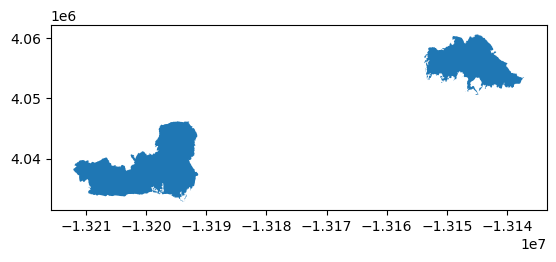

In [15]:
perimeter.plot()

In [16]:
# Reading in the landsat data.
landsat = xr.open_dataset(os.path.join('data',
                                       'landsat8-2025-02-23-palisades-eaton.nc'))

### Landsat Data Exploration

In [17]:
landsat

<xarray.Dataset> Size: 78MB
Dimensions:      (y: 1418, x: 2742)
Coordinates:
  * y            (y) float64 11kB 3.799e+06 3.799e+06 ... 3.757e+06 3.757e+06
  * x            (x) float64 22kB 3.344e+05 3.344e+05 ... 4.166e+05 4.166e+05
    time         datetime64[ns] 8B ...
Data variables:
    red          (y, x) float32 16MB ...
    green        (y, x) float32 16MB ...
    blue         (y, x) float32 16MB ...
    nir08        (y, x) float32 16MB ...
    swir22       (y, x) float32 16MB ...
    spatial_ref  int64 8B ...

In [18]:
# Printing the type of the landsat data.
print('The landsat data is:', type(landsat))

The landsat data is: <class 'xarray.core.dataset.Dataset'>


In [19]:
# Printing the data variables of the landsat data.
print('Data variables of the landsat data:\n', landsat.data_vars)

Data variables of the landsat data:
 Data variables:
    red          (y, x) float32 16MB ...
    green        (y, x) float32 16MB ...
    blue         (y, x) float32 16MB ...
    nir08        (y, x) float32 16MB ...
    swir22       (y, x) float32 16MB ...
    spatial_ref  int64 8B ...


In [20]:
# Printing the dimensions of the landsat data.
print('Dimensions of the landsat data:', landsat.sizes)

Dimensions of the landsat data: Frozen({'y': 1418, 'x': 2742})


In [21]:
# Printing the coordinates of the landsat data.
print('Coordinates of the landsat data:', landsat.coords)

Coordinates of the landsat data: Coordinates:
  * y        (y) float64 11kB 3.799e+06 3.799e+06 ... 3.757e+06 3.757e+06
  * x        (x) float64 22kB 3.344e+05 3.344e+05 ... 4.166e+05 4.166e+05
    time     datetime64[ns] 8B ...


**Landsat Description:**

## 4. Restoring Geospatial Information

In [22]:
# Printing the CRS of the landsat data.
print('CRS of the landsat data:', landsat.rio.crs)

CRS of the landsat data: None


 The CRS of the landsat data is stored in the `spatial_ref` variable.

In [23]:
# Printing the CRS of the landsat data, which is stored in the spatial_ref variable.
print('CRS:', landsat.spatial_ref.crs_wkt)

CRS: PROJCS["WGS 84 / UTM zone 11N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-117],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32611"]]


In [24]:
# Setting the crs of the landsat data.
landsat = landsat.rio.write_crs(landsat.spatial_ref.crs_wkt)

In [25]:
# Checking that the CRS of the landsat data was updated.
print('CRS:', landsat.rio.crs)

CRS: EPSG:32611


## True Color Image

Without creating any new variables:

- select the red, green, and blue variables (in that order) of the xarray.Dataset holding the Landsat data,

- convert it to a numpy.array using the to_array() method, and then

- use .plot.imshow() to create an RGB image with the data. There will be two warnings, that’s ok.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


/opt/anaconda3/envs/eds220-env/lib/python3.11/site-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


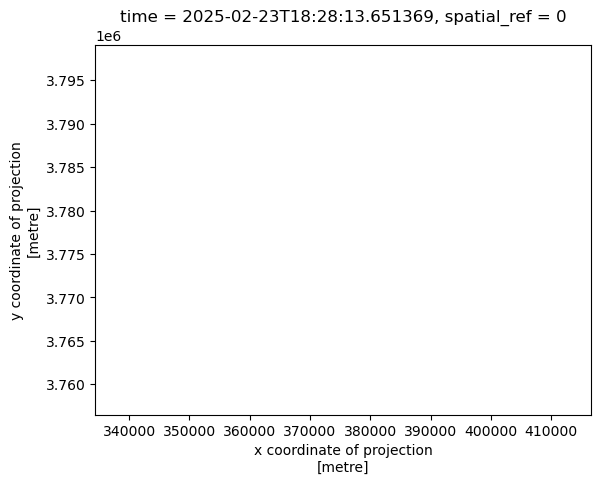

In [26]:
# Plotting the red, green, blue variables.
landsat[['red', 'green', 'blue']].to_array().plot.imshow()

Adjust the scale used for plotting the bands to get a true color image. HINT: Check the robust parameter. The issue here is the clouds: their RGB values are outliers and cause the other values to be squished when plotting.

/opt/anaconda3/envs/eds220-env/lib/python3.11/site-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


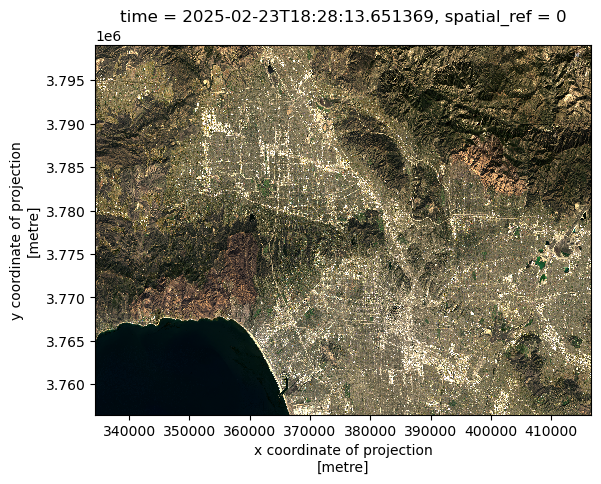

In [27]:
# Plotting the red, green, blue variables, using the robust arguement.
landsat[['red', 'green', 'blue']].to_array().plot.imshow(robust=True)

In [28]:
# Determining which bands in the landsat data have NA values.
np.isnan(landsat[['red', 'green', 'blue']]).any()

<xarray.Dataset> Size: 19B
Dimensions:      ()
Coordinates:
    time         datetime64[ns] 8B 2025-02-23T18:28:13.651369
    spatial_ref  int64 8B 0
Data variables:
    red          bool 1B False
    green        bool 1B True
    blue         bool 1B True

There are `nan` values in the green and blue bands

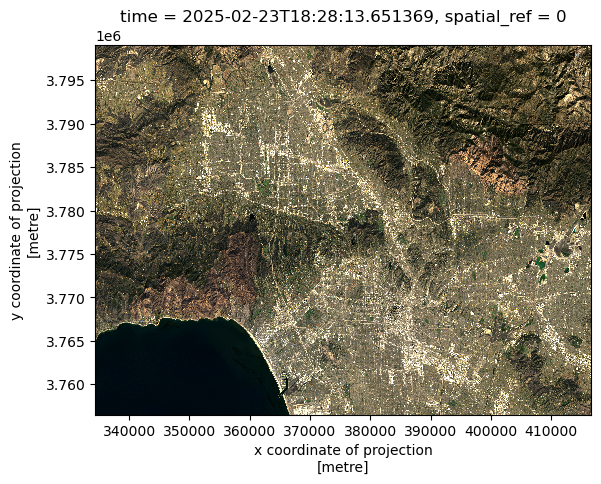

In [ ]:
# Replacing NA values with 0 and plotting the landsat data.
landsat[['red', 'green', 'blue']].fillna(0).to_array().plot.imshow(robust=True)

## False color image

Without creating any new variables, create a false color image by plotting the short-wave infrared (swir22), near-infrared, and red variables (in that order).

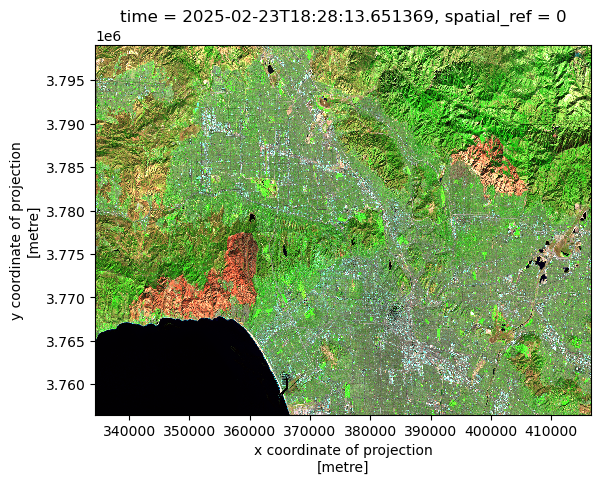

In [ ]:
# Plotting the 'swir22', 'nir08', and 'red' bands.
landsat[['swir22', 'nir08', 'red']].fillna(0).to_array().plot.imshow(robust=True)

In [31]:
false_color = landsat[['swir22', 'nir08', 'red']].fillna(0).to_array()

In [ ]:
perimeter = perimeter.to_crs(landsat.rio.crs)
assert perimeter.crs==landsat.rio.crs

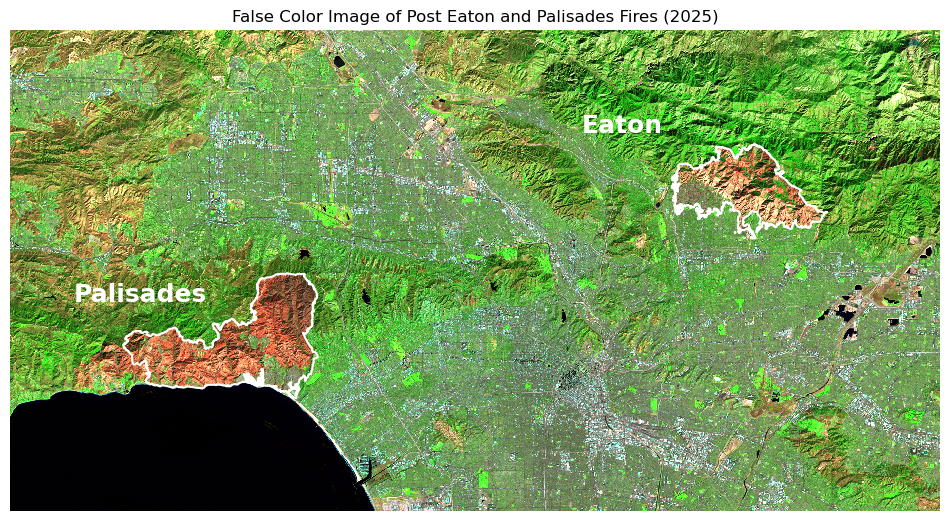

In [ ]:
fig, ax=plt.subplots(figsize=(12,10))

# Remove the axis for a cleaner map
ax.axis('off')

landsat[['swir22', 'nir08', 'red']].fillna(0).to_array().plot.imshow(
    ax=ax,
    robust=True)

perimeter.plot(ax=ax,
               edgecolor='white',
               facecolor='none',
               linewidth= 1.5)

ax.text(x=340000,
         y=3775000,
         s='Palisades',
         color='white',
         fontsize=18,
         weight='bold')

ax.text(x=385000,
        y=3790000,
        s='Eaton',
        color='white',
        fontsize=18,
        weight='bold')

plt.title('False Color Image of Post Eaton and Palisades Fires (2025)')

plt.show()

**Map Description:** Using the short wave infared, near-red infared, and red bands from the landsat data, a false color image was created to display the effects of the Eaton and Palisade fires in January 2025. The effects of the fire can be seen as the areas colored in an orange/red color, and the perimeters of the fires are highlighted in white.